In [7]:
#pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn sklearn

**System Deteksi Penipuan Kartu Kredit (Credit Card Fraud)**
===
---

System Deteksi Penipuan Kartu Kredit (Credit Card Fraud) dengan imbalance dataset


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, f1_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import display

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

## **Data Preparation**

### **Input Datasets**
---


 **Tentang Dataset**

 **Konteks**

Penting bagi perusahaan kartu kredit untuk dapat mengenali transaksi kartu kredit yang mencurigakan agar pelanggan tidak dikenakan biaya untuk barang yang tidak mereka beli.

 **Content**

Dataset ini berisi transaksi yang dilakukan dengan kartu kredit pada September 2013 oleh pemegang kartu kredit di Eropa.
Dataset ini menampilkan transaksi yang terjadi dalam dua hari, di mana terdapat 492 transaksi Fraud(penipuan) dari total 284.807 transaksi. Dataset ini sangat tidak seimbang, kelas positif (transaksi Fraud(penipuan)) hanya menyumbang 0,172% dari total transaksi.

Data ini hanya berisi variabel input numerik yang merupakan hasil transformasi PCA. Sayangnya, karena masalah kerahasiaan, kami tidak dapat menyediakan fitur asli dan informasi latar belakang lebih lanjut tentang data. Fitur V1, V2, … V28 adalah komponen utama yang diperoleh dengan PCA, fitur-fitur yang tidak ditransformasi dengan PCA adalah 'Time' dan 'Amount'. Fitur 'Time' berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur 'Amount' adalah jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran sensitif biaya yang bergantung pada contoh. Fitur 'Class' adalah variabel respons dan bernilai 1 jika terjadi Fraud(penipuan) dan 0 jika tidak.

**link dataset :** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



In [9]:
raw_data = pd.read_csv('creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### **Metadata dataset**


memastikan tidak ada data yang memiliki value null 

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

np.int64(0)

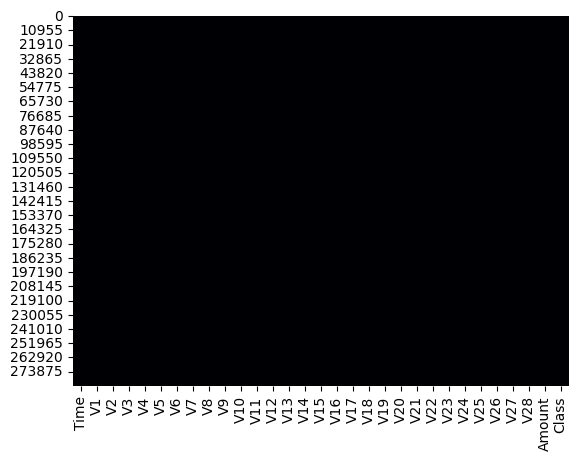

In [11]:
sns.heatmap(raw_data.isnull(),cmap = 'magma',cbar = False)

raw_data.isnull().max().sum()

menurut hasil pengecekan `isnull` dapat dipastikan tidak ada data yang memiliki value null

pengecekan `isnull` bisa dilakukan dengan 2 cara yaitu dengan heatmap atau langsung memerikasa menggunakan dataframe

In [12]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [13]:
raw_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

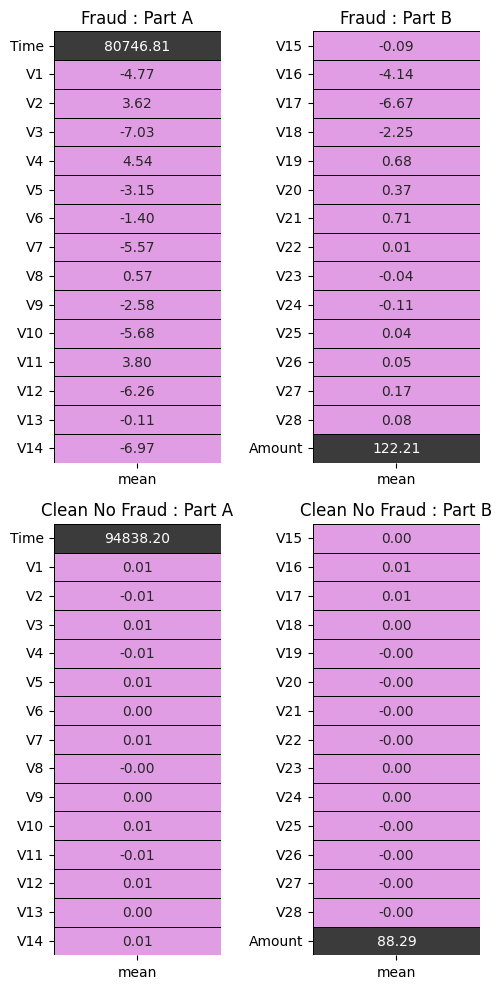

In [14]:
# Fraud vs No Fraud
fraud   = raw_data[raw_data['Class'] == 1].describe().T
nofraud = raw_data[raw_data['Class'] == 0].describe().T

colors = ["#e19de4", '#3B3B3C']

# 2×2 subplots 
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,10))

# Heatmap 
sns.heatmap(
    fraud[["mean"]].iloc[:15, :], annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[0, 0])
ax[0, 0].set_title('Fraud : Part A')

sns.heatmap(
    fraud[["mean"]].iloc[15:30, :],annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[0, 1])
ax[0, 1].set_title('Fraud : Part B')

sns.heatmap(
    nofraud[["mean"]].iloc[:15, :],annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[1, 0])
ax[1, 0].set_title('Clean No Fraud : Part A')

sns.heatmap(
    nofraud[["mean"]].iloc[15:30, :],annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[1, 1])
ax[1, 1].set_title('Clean No Fraud : Part B')

fig.tight_layout(w_pad=2)
plt.show()

**Mean** Value merupakan fitur untuk Fraud dan Clean No Fraud

Untuk **Clean No Fraud**, Mean Value **V1 hingga V28** hampir **0** untuk semua kasus. Mean jumlah transaksi, 88.29, lebih kecil daripada  mean jumlah transaksi **Fraud(penipuan)** , 122.21



### **Visualisasi Data**

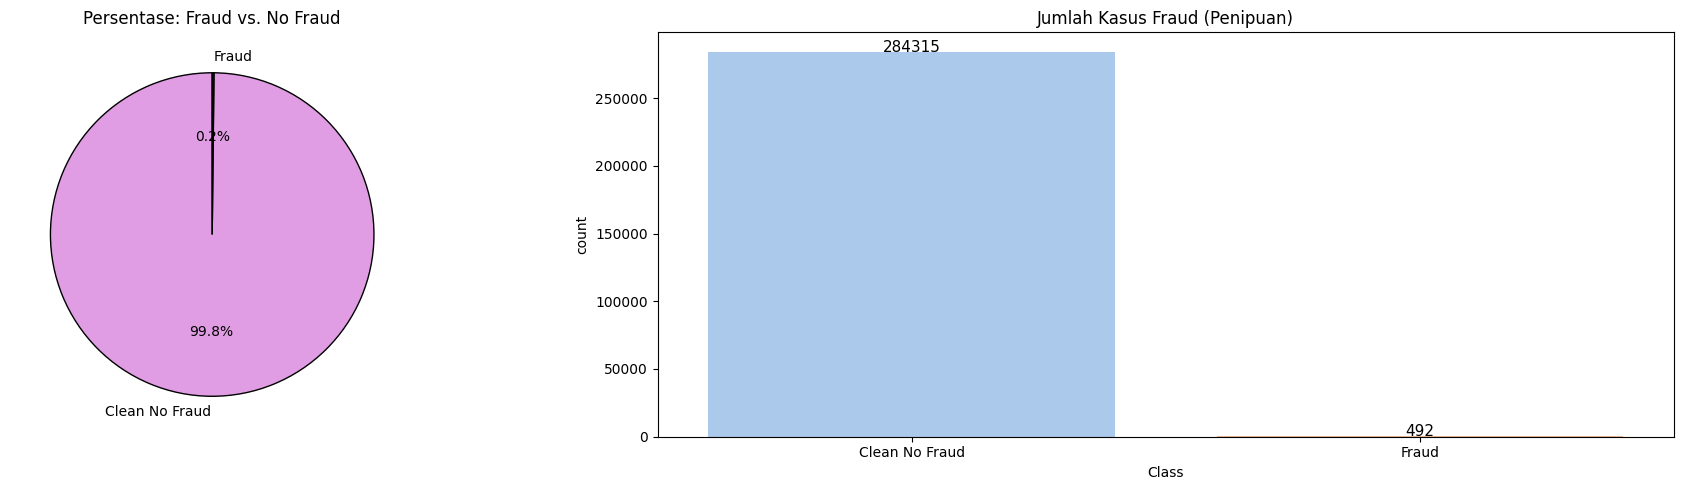

In [15]:
# Hitung persentase
fraud   = len(raw_data[raw_data['Class'] == 1]) / len(raw_data) * 100
nofraud = len(raw_data[raw_data['Class'] == 0]) / len(raw_data) * 100
# Urutan [nofraud, fraud] supaya label "Clean No Fraud" muncul lebih dulu pada pie
fraud_percentage = [nofraud, fraud]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Subplot 1: Pie chart
axes[0].pie(
    fraud_percentage,
    labels=['Clean No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Persentase: Fraud vs. No Fraud')

# Subplot 2: Countplot dengan palette
axes[1] = sns.countplot(
    x='Class', hue='Class', data=raw_data, palette="pastel", dodge=False, legend=False, ax=axes[1])

# posisi ticks dan label 
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Clean No Fraud', 'Fraud'])
axes[1].set_title('Jumlah Kasus Fraud (Penipuan)')

# angka di atas tiap bar
for rect in axes[1].patches:
    height = rect.get_height()
    axes[1].text(
        rect.get_x() + rect.get_width() / 2, height + 2, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

In [16]:
print('Clean No Fraud', round(raw_data['Class'].value_counts()[0]/len(raw_data) * 100,2), '% dari keseluruhan dataset')
print('Fraud', round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100,2), '% dari keseluruhan dataset')

Clean No Fraud 99.83 % dari keseluruhan dataset
Fraud 0.17 % dari keseluruhan dataset


dapat dilihat Dataset yang diggunakan sanggat imbalance lebih dominan ke No Fraud dan dapat menyebabkan error dan overfit dikarenakan data di dominasi oleh No fraud

## **Pemilihan Fitur**

Pada tahap ini, dibuat dua set data yang berbeda untuk permodelan. Setiap set data menggunakan pendekatan seleksi fitur yang berbeda untuk membandingkan pendekatan mana yang menghasilkan model dengan kinerja terbaik.
- Model 1: Menggunakan fitur-fitur yang dipilih berdasarkan analisis Correlation terhadap kelas target.
- Model 2: Menggunakan 20 fitur teratas yang dipilih berdasarkan skor uji statistik ANOVA F-test.

In [17]:
data = raw_data.copy()

### **Correlation Matrix**

**Correlation matrix** merupakan kunci untuk memahami data. Tujuan utamanya adalah mengidentifikasi fitur-fitur yang memiliki dampak signifikan terhadap transaksi tertentu yang merupakan Fraud(penipuan). Namun, untuk mengamati fitur-fitur mana yang memiliki korelasi positif atau negatif yang tinggi dengan transaksi Fraud(penipuan), penting untuk menggunakan dataframe yang tepat (subsample).

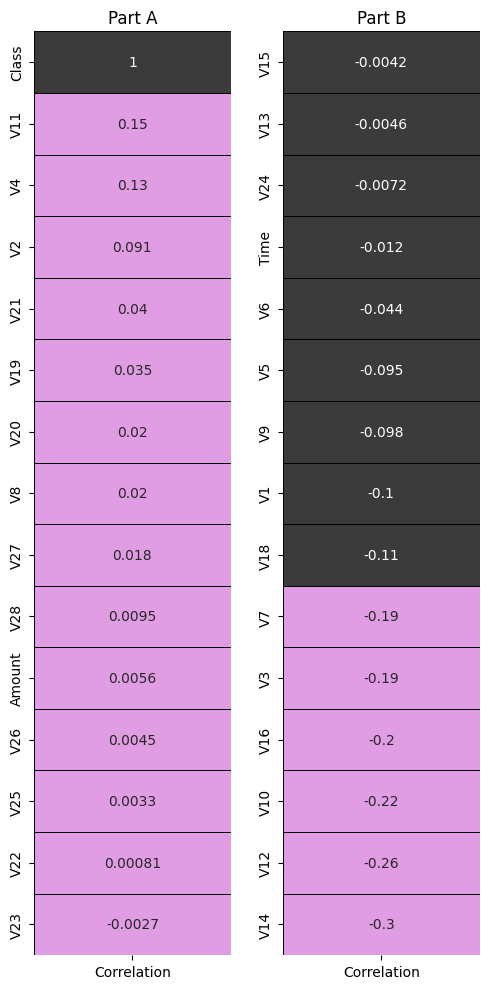

In [18]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))
# part A
plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part A')

# part B
plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part B')

fig.tight_layout(w_pad = 2)

Dalam pemilihan fitur, kriteria eksklusi akan diterapkan untuk menghilangkan fitur yang menunjukkan value korelasi antara [-0.1 dan 0.1].

Korelasi berikut ini telah ditetapkan: V4 dan V11 menunjukkan korelasi positif, sementara V7, V3, V16, V10, V12, V14, dan V17 menunjukkan korelasi negatif dengan fitur Class.

### **ANOVA**

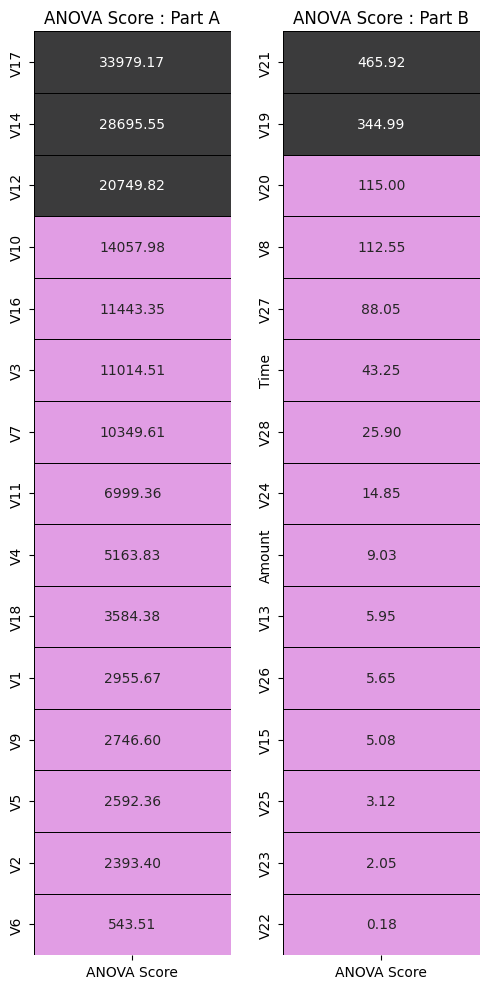

In [19]:
# feature & target 
feature = data.loc[:, :'Amount']    
target  = data.loc[:,  'Class']  

# SelectKBest
best_feature = SelectKBest(score_func=f_classif, k='all')
fit = best_feature.fit(feature, target)

# DataFrame ANOVA Score
featurescore = pd.DataFrame(
    data=fit.scores_, index=feature.columns, columns=["ANOVA Score"])
featurescore = featurescore.sort_values(by="ANOVA Score", ascending=False)

# subplot untuk menampilkan bagian (A dan B)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 10))

# Heatmap part A
sns.heatmap(
    featurescore.iloc[:15, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=axes[0])
axes[0].set_title('ANOVA Score : Part A')

# Heatmap part B
sns.heatmap(
    featurescore.iloc[15:30, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=axes[1])
axes[1].set_title('ANOVA Score : Part B')

fig.tight_layout(w_pad=2)
plt.show()

semakin tinggi Score ANOVA, semakin penting fitur tersebut terhadap variabel target.

Dari hasil nilai Score ANOVA di atas, maka fitur dengan nilai kurang dari 50 akan dibuang.

Berdasarkan hasil tersebut, maka akan dibuat 2 model berdasarkan fitur yang dipilih dari Correlation Plot & ANOVA Score.

### Modeling

#### Model Bedasarkan Correlation

In [20]:
# Model 1: Fitur dari Analisis Plot Korelasi
model1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy()
model1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


#### Model Bedasarkan ANOVA Score

In [21]:
# Model 2: Seleksi Fitur dari Skor ANOVA
featurescore = pd.DataFrame(
    data=SelectKBest(score_func=f_classif, k='all').fit(data.loc[:, :'Amount'], data.loc[:, 'Class']).scores_,
    index=data.loc[:, :'Amount'].columns,
    columns=["ANOVA Score"]
).sort_values(by="ANOVA Score", ascending=False)

# Menghapus fitur dengan skor ANOVA terendah (selain 20 teratas)
model2 = data.drop(columns=list(featurescore.index[20:]))
model2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


## **Data Splitting Untuk Training dan Testing**

Pemisahan Data Latih dan Data Uji merupakan langkah koreksi yang paling penting untuk mencegah kebocoran data. Set data asli (sebelum balance) dibagi menjadi data latih dan data uji. Data uji ini akan disimpan dan tidak akan digunakan hingga tahap evaluasi akhir, sehingga memastikan objektivitas pengujian model.

In [22]:
# Pemisahan Data untuk Model 1
X1 = model1.drop('Class', axis=1)
y1 = model1['Class']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=2, stratify=y1)

# Pemisahan Data untuk Model 2
X2 = model2.drop('Class', axis=1)
y2 = model2['Class']
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=2, stratify=y2)

## **Balancing Data training**

Setelah data dipisah, teknik penyeimbangan data (kombinasi undersampling dan SMOTE) diterapkan. Penting untuk dicatat bahwa proses ini hanya dilakukan pada data latih. Hal ini bertujuan untuk melatih model pada data yang proporsional tanpa memberikan informasi apapun dari data uji ke dalam proses pelatihan.

**SMOTE**

**Synthetic Minority Over-sampling Technique** (**SMOTE**) adalah sebuah metode yang digunakan untuk mengatasi Unbalance class dalam dataset dengan cara menciptakan data baru untuk class non-dominan. Proses ini melibatkan identifikasi titik data yang berdekatan dalam ruang fitur. **SMOTE** secara efektif memperbanyak representasi class non-dominan dalam dataset tanpa duplikasi data yang ada.

In [23]:
# Mendefinisikan strategi balancing
over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.1, random_state=42)

#### Data Balancing untuk model Correlation

In [24]:
# Menerapkan pipeline balancing pada data latih untuk Model 1
pipeline1 = Pipeline(steps=[('u', under), ('o', over)])
x_train1_res, y_train1_res = pipeline1.fit_resample(x_train1, y_train1)

#### Data Balancing untuk model ANOVA Score

In [25]:
# Menerapkan pipeline balancing pada data latih untuk Model 2
pipeline2 = Pipeline(steps=[('u', under), ('o', over)])
x_train2_res, y_train2_res = pipeline2.fit_resample(x_train2, y_train2)

***Penjelasan** 

Perhitungan untuk Data Balancing :
- **Sampling Strategy**: Ini adalah rasio yang menjadi parameter umum untuk oversampling dan undersampling.
- **Sampling Strategy**: **(Jumlah Sampel Kelas non-dominan) / (Jumlah Sampel Kelas dominan)**
- Dalam kasus ini,

    - Kelas **dominan**: Tidak Ada Kasus Penipuan : 284.315 sampel
    - Kelas **non-dominan**: Kasus Penipuan : 492 sampel

- Untuk dataset yang imbalanced, data diduplikasi guna mengatasi potensi bias dalam prediksi.
- Akibat proses duplikasi ini, data sintetis diterapkan untuk tujuan pemodelan demi memastikan prediksi tidak condong ke nilai kelas target yang dominan.
- Oleh karena itu, mengevaluasi model menggunakan akurasi akan menyesatkan. Sebagai gantinya, akan digunakan confusion matrix, ROC-AUC graph, dan ROC-AUC score untuk evaluasi model.


In [26]:
# --- Fungsi Bantuan untuk Evaluasi ---
def model_evaluation(classifier, x_test, y_test):
    y_pred = classifier.predict(x_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bukan Penipuan', 'Penipuan'], yticklabels=['Bukan Penipuan', 'Penipuan'])
    plt.title('Confusion Matrix')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

    # Laporan Klasifikasi
    print(classification_report(y_test, y_pred, target_names=['Bukan Penipuan', 'Penipuan']))

## **Analisis Kinerja per Model Klasifikasi**

Berikut adalah analisis mendalam untuk setiap model.

### **Logistic Regression**

Metode Regresi Logistik adalah model linear yang digunakan untuk klasifikasi biner.

ANALISIS: LOGISTIC REGRESSION

### Hasil pada Fitur Korelasi ###


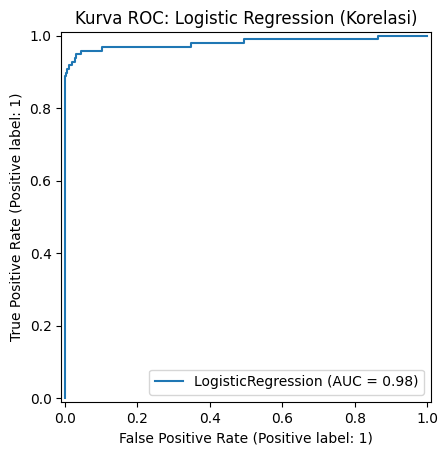

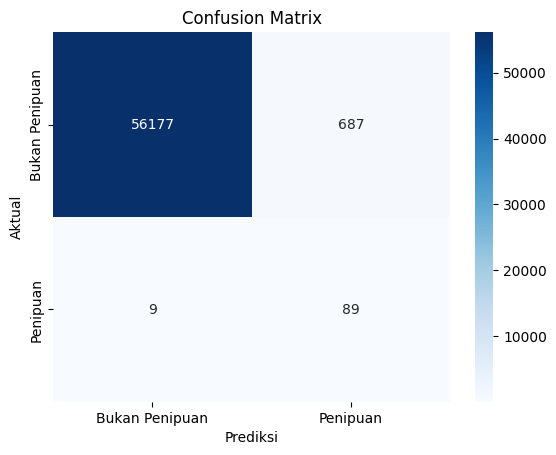

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.99      0.99     56864
      Penipuan       0.11      0.91      0.20        98

      accuracy                           0.99     56962
     macro avg       0.56      0.95      0.60     56962
  weighted avg       1.00      0.99      0.99     56962


### Hasil pada Fitur ANOVA ###


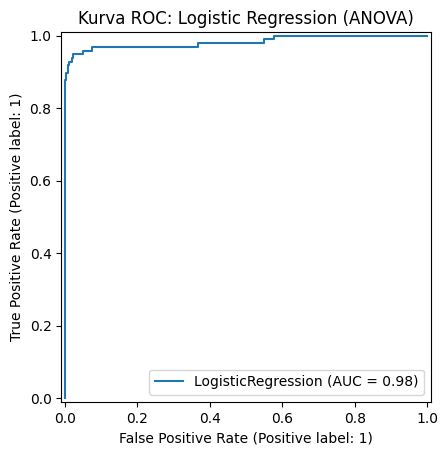

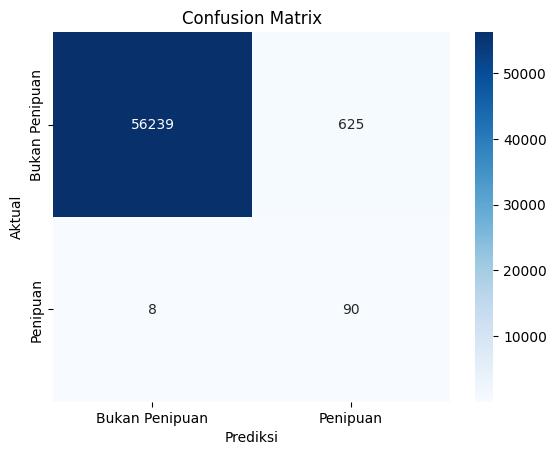

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.99      0.99     56864
      Penipuan       0.13      0.92      0.22        98

      accuracy                           0.99     56962
     macro avg       0.56      0.95      0.61     56962
  weighted avg       1.00      0.99      0.99     56962



In [27]:
# --- Logistic Regression ---
print("="*50)
print("ANALISIS: LOGISTIC REGRESSION")
print("="*50)
lr_clf = LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
lr_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(lr_clf, x_test1, y_test1)
plt.title('Kurva ROC: Logistic Regression (Korelasi)')
plt.show()
model_evaluation(lr_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
lr_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(lr_clf, x_test2, y_test2)
plt.title('Kurva ROC: Logistic Regression (ANOVA)')
plt.show()
model_evaluation(lr_clf, x_test2, y_test2)

### **Support Vector Classifier (SVC)**


ANALISIS: SUPPORT VECTOR CLASSIFIER (SVC)

### Hasil pada Fitur Korelasi ###


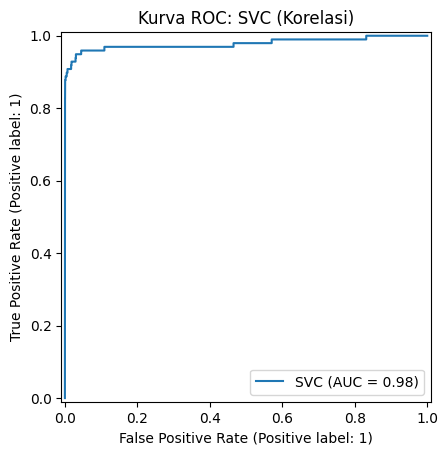

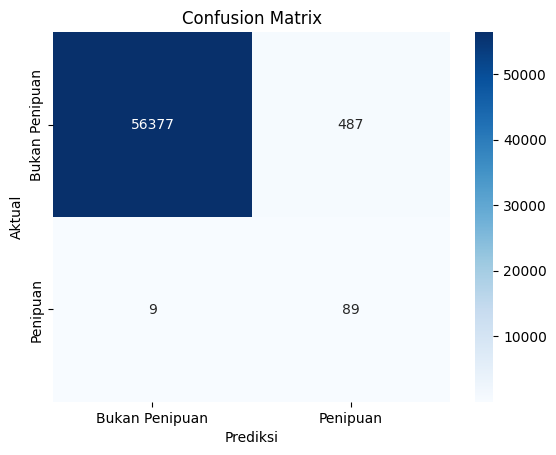

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.99      1.00     56864
      Penipuan       0.15      0.91      0.26        98

      accuracy                           0.99     56962
     macro avg       0.58      0.95      0.63     56962
  weighted avg       1.00      0.99      0.99     56962


### Hasil pada Fitur ANOVA ###


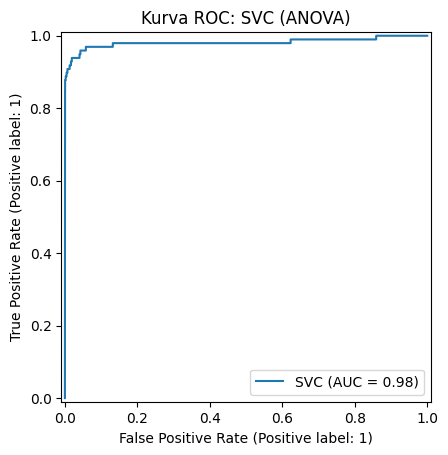

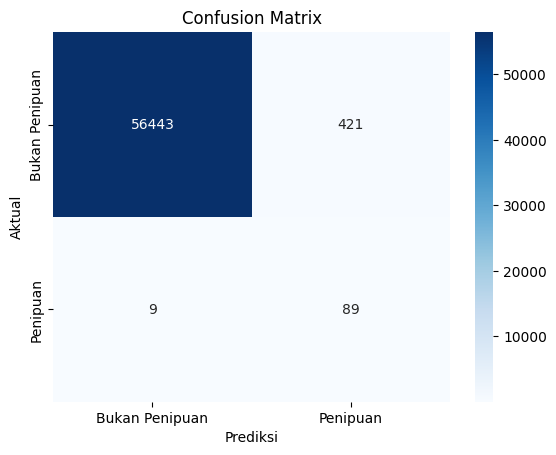

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.99      1.00     56864
      Penipuan       0.17      0.91      0.29        98

      accuracy                           0.99     56962
     macro avg       0.59      0.95      0.64     56962
  weighted avg       1.00      0.99      0.99     56962



In [28]:
# --- Support Vector Classifier ---
print("\n" + "="*50)
print("ANALISIS: SUPPORT VECTOR CLASSIFIER (SVC)")
print("="*50)
svc_clf = SVC(kernel='linear', C=0.1, probability=True, random_state=42)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
svc_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(svc_clf, x_test1, y_test1)
plt.title('Kurva ROC: SVC (Korelasi)')
plt.show()
model_evaluation(svc_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
svc_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(svc_clf, x_test2, y_test2)
plt.title('Kurva ROC: SVC (ANOVA)')
plt.show()
model_evaluation(svc_clf, x_test2, y_test2)

### **Decision Tree Classifier**


ANALISIS: DECISION TREE CLASSIFIER

### Hasil pada Fitur Korelasi ###


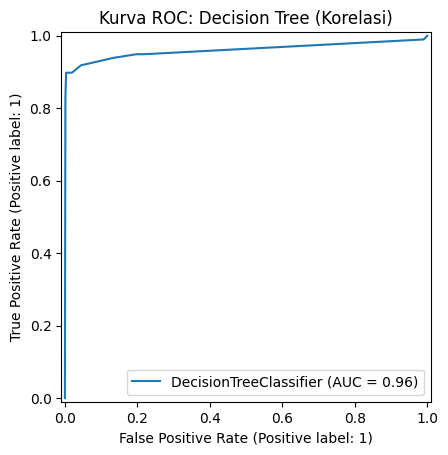

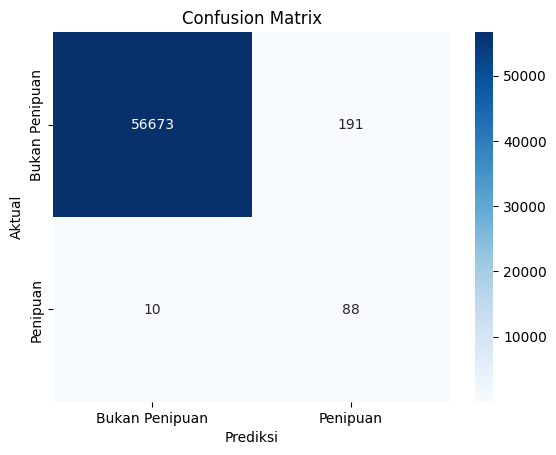

                precision    recall  f1-score   support

Bukan Penipuan       1.00      1.00      1.00     56864
      Penipuan       0.32      0.90      0.47        98

      accuracy                           1.00     56962
     macro avg       0.66      0.95      0.73     56962
  weighted avg       1.00      1.00      1.00     56962


### Hasil pada Fitur ANOVA ###


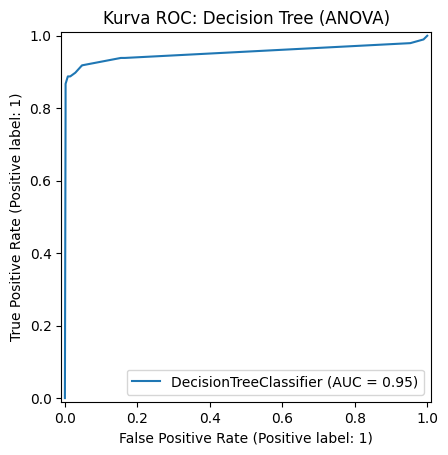

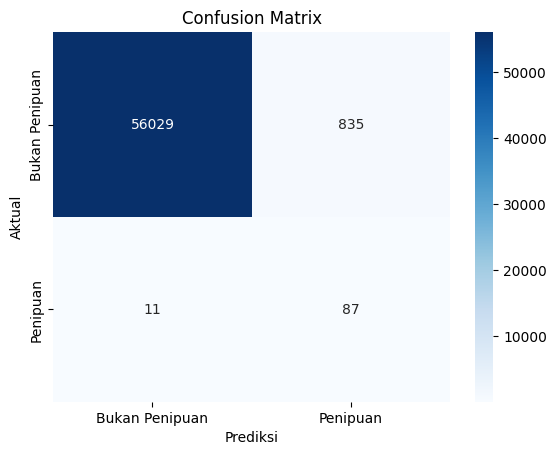

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.99      0.99     56864
      Penipuan       0.09      0.89      0.17        98

      accuracy                           0.99     56962
     macro avg       0.55      0.94      0.58     56962
  weighted avg       1.00      0.99      0.99     56962



In [29]:
# --- Decision Tree Classifier ---
print("\n" + "="*50)
print("ANALISIS: DECISION TREE CLASSIFIER")
print("="*50)
dt_clf = DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
dt_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(dt_clf, x_test1, y_test1)
plt.title('Kurva ROC: Decision Tree (Korelasi)')
plt.show()
model_evaluation(dt_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
dt_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(dt_clf, x_test2, y_test2)
plt.title('Kurva ROC: Decision Tree (ANOVA)')
plt.show()
model_evaluation(dt_clf, x_test2, y_test2)

### **Random Forest Classifier**


ANALISIS: RANDOM FOREST CLASSIFIER

### Hasil pada Fitur Korelasi ###


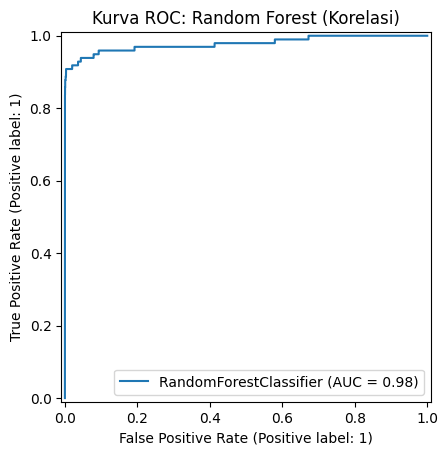

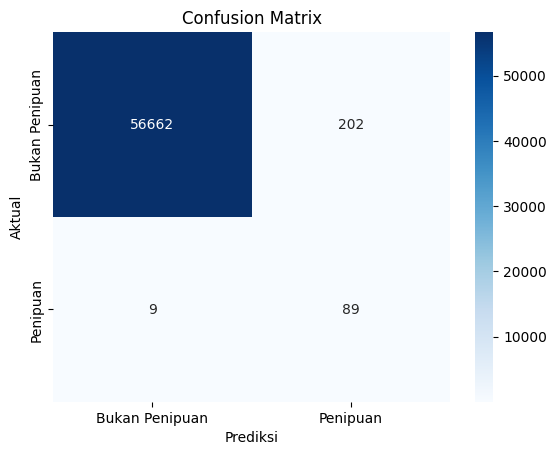

                precision    recall  f1-score   support

Bukan Penipuan       1.00      1.00      1.00     56864
      Penipuan       0.31      0.91      0.46        98

      accuracy                           1.00     56962
     macro avg       0.65      0.95      0.73     56962
  weighted avg       1.00      1.00      1.00     56962


### Hasil pada Fitur ANOVA ###


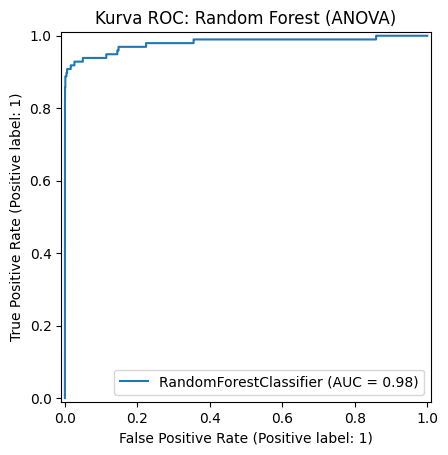

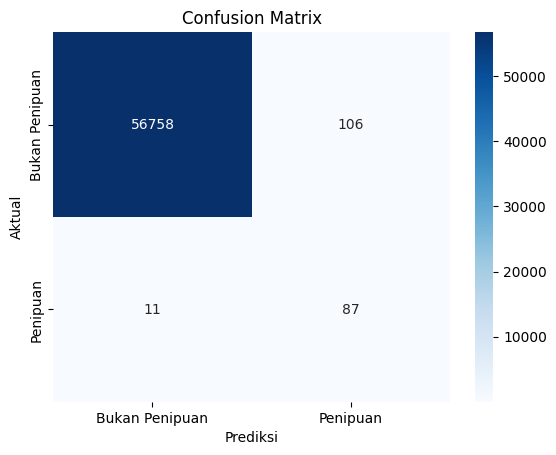

                precision    recall  f1-score   support

Bukan Penipuan       1.00      1.00      1.00     56864
      Penipuan       0.45      0.89      0.60        98

      accuracy                           1.00     56962
     macro avg       0.73      0.94      0.80     56962
  weighted avg       1.00      1.00      1.00     56962



In [30]:
# --- Random Forest Classifier ---
print("\n" + "="*50)
print("ANALISIS: RANDOM FOREST CLASSIFIER")
print("="*50)
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
rf_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(rf_clf, x_test1, y_test1)
plt.title('Kurva ROC: Random Forest (Korelasi)')
plt.show()
model_evaluation(rf_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
rf_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(rf_clf, x_test2, y_test2)
plt.title('Kurva ROC: Random Forest (ANOVA)')
plt.show()
model_evaluation(rf_clf, x_test2, y_test2)

### **K-Nearest Neighbors (KNN)**


ANALISIS: K-NEAREST NEIGHBORS (KNN)

### Hasil pada Fitur Korelasi ###


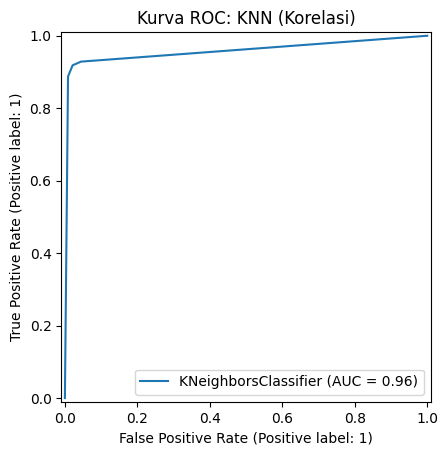

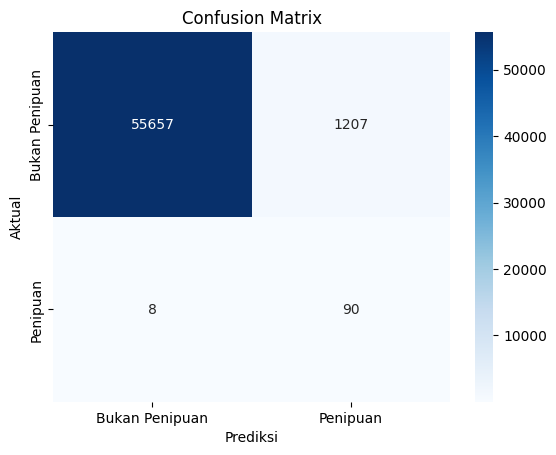

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99     56864
      Penipuan       0.07      0.92      0.13        98

      accuracy                           0.98     56962
     macro avg       0.53      0.95      0.56     56962
  weighted avg       1.00      0.98      0.99     56962


### Hasil pada Fitur ANOVA ###


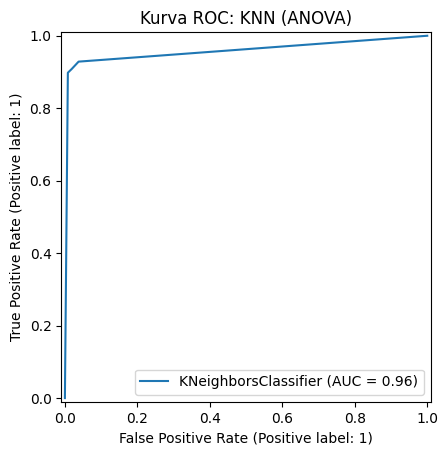

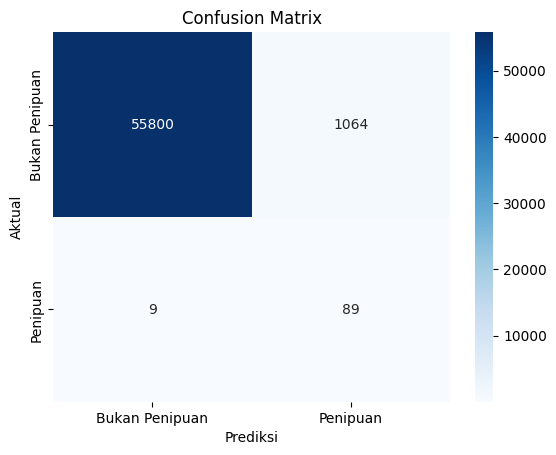

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99     56864
      Penipuan       0.08      0.91      0.14        98

      accuracy                           0.98     56962
     macro avg       0.54      0.94      0.57     56962
  weighted avg       1.00      0.98      0.99     56962



In [31]:
# --- K-Nearest Neighbors ---
print("\n" + "="*50)
print("ANALISIS: K-NEAREST NEIGHBORS (KNN)")
print("="*50)
knn_clf = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
knn_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(knn_clf, x_test1, y_test1)
plt.title('Kurva ROC: KNN (Korelasi)')
plt.show()
model_evaluation(knn_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
knn_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(knn_clf, x_test2, y_test2)
plt.title('Kurva ROC: KNN (ANOVA)')
plt.show()
model_evaluation(knn_clf, x_test2, y_test2)

## **Rangkuman Hasil Akhir**

Langkah terakhir adalah membuat tabel rangkuman untuk membandingkan metrik performa utama dari setiap model pada kedua skenario seleksi fitur. Ini mempermudah dalam penentuan model mana yang paling optimal untuk kasus penggunaan ini.

In [32]:
# --- Persiapan Data (Langkah yang sudah dikoreksi) ---
data = pd.read_csv('creditcard.csv')
model1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy()
featurescore = pd.DataFrame(data=SelectKBest(score_func=f_classif, k='all').fit(data.loc[:, :'Amount'], data.loc[:, 'Class']).scores_, index=data.loc[:, :'Amount'].columns, columns=["ANOVA Score"]).sort_values(by="ANOVA Score", ascending=False)
model2 = data.drop(columns=list(featurescore.index[20:]))

X1, y1 = model1.drop('Class', axis=1), model1['Class']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=2, stratify=y1)
X2, y2 = model2.drop('Class', axis=1), model2['Class']
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=2, stratify=y2)

pipeline_balancer = Pipeline(steps=[('u', RandomUnderSampler(sampling_strategy=0.1, random_state=42)),
                                    ('o', SMOTE(sampling_strategy=0.5, random_state=42))])
x_train1_res, y_train1_res = pipeline_balancer.fit_resample(x_train1, y_train1)
x_train2_res, y_train2_res = pipeline_balancer.fit_resample(x_train2, y_train2)

# Daftar model
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000)),
    ("Support Vector Classifier", SVC(kernel='linear', C=0.1, probability=True, random_state=42)),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)),
    ("Random Forest Classifier", RandomForestClassifier(max_depth=4, random_state=0)),
    ("K-Nearest Neighbors", KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1))
]

# Fungsi untuk mendapatkan metrik ringkasan
def get_summary_metrics(models, x_train_res, y_train_res, x_test, y_test):
    records = []
    for idx, (name, clf) in enumerate(models, start=1):
        clf.fit(x_train_res, y_train_res)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        # Validasi silang pada data latih yang sudah diseimbangkan
        cv_score = cross_val_score(clf, x_train_res, y_train_res, cv=cv, scoring='roc_auc').mean()
        # Evaluasi pada data uji orisinal
        y_pred_proba = clf.predict_proba(x_test)[:,1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, clf.predict(x_test))
        records.append({
            "No.": idx,
            "ML Algorithm": name,
            "Cross Validation ROC AUC": f"{cv_score:.2%}",
            "Test ROC AUC": f"{roc_auc:.2%}",
            "F1 Score (Fraud)": f"{f1:.2%}"
        })
    return pd.DataFrame(records)

# --- Menampilkan Tabel Rangkuman ---

print("### Tabel Hasil: Plot Korelasi (Telah Dikoreksi) ###")
results_corr = get_summary_metrics(models, x_train1_res, y_train1_res, x_test1, y_test1)
display(results_corr)

print("\n### Tabel Hasil: Skor ANOVA (Telah Dikoreksi) ###")
results_anova = get_summary_metrics(models, x_train2_res, y_train2_res, x_test2, y_test2)
display(results_anova)

### Tabel Hasil: Plot Korelasi (Telah Dikoreksi) ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,98.13%,97.99%,20.37%
1,2,Support Vector Classifier,98.04%,97.81%,26.41%
2,3,Decision Tree Classifier,97.20%,96.03%,46.68%
3,4,Random Forest Classifier,98.09%,97.81%,45.76%
4,5,K-Nearest Neighbors,99.33%,95.81%,12.90%



### Tabel Hasil: Skor ANOVA (Telah Dikoreksi) ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,98.28%,98.26%,22.14%
1,2,Support Vector Classifier,98.12%,98.13%,29.28%
2,3,Decision Tree Classifier,96.77%,95.31%,17.06%
3,4,Random Forest Classifier,98.04%,98.00%,59.79%
4,5,K-Nearest Neighbors,99.64%,95.86%,14.23%


Dengan mengubah urutan dari Balancing -> Split -> Train -> Test (salah) menjadi Split -> Balance Training Data -> Train -> Test (benar), kebocoran data dapat diatasi sepenuhnya. Alur kerja yang telah diperbaiki ini memastikan bahwa evaluasi model mencerminkan kemampuan generalisasi yang sesungguhnya terhadap data baru.

## **Kesimpulan Otomatis Berdasarkan Performa Model**

In [33]:
# Menambahkan kolom untuk mengidentifikasi asal set fitur
results_corr['Metode Fitur'] = 'Plot Korelasi'
results_anova['Metode Fitur'] = 'Skor ANOVA'

# Menggabungkan kedua hasil evaluasi ke dalam satu DataFrame
all_results_df = pd.concat([results_corr, results_anova], ignore_index=True)

# Mengonversi F1-Score dari string ke numerik untuk proses pengurutan
# (menghilangkan '%' dan mengubah tipe data)
all_results_df['F1 Score Numerik'] = all_results_df['F1 Score (Fraud)'].str.replace('%', '', regex=False).astype(float)

# Mengurutkan DataFrame berdasarkan F1-Score tertinggi
sorted_results = all_results_df.sort_values(by='F1 Score Numerik', ascending=False)

# Mengambil informasi dari model terbaik (baris pertama setelah diurutkan)
best_model_info = sorted_results.iloc[0]
best_model_name = best_model_info['ML Algorithm']
best_f1_score_str = best_model_info['F1 Score (Fraud)']
best_feature_set = best_model_info['Metode Fitur']

# Mencetak kesimpulan
print("\n" + "="*25 + " KESIMPULAN " + "="*25)
print(f"\nBerdasarkan evaluasi komparatif dari metrik F1-Score, model dengan kinerja terbaik adalah '{best_model_name}'.")
print(f"Performa optimal ini dicapai saat model dilatih menggunakan set fitur dari '{best_feature_set}'.")
print(f"Model tersebut berhasil mencapai F1-Score sebesar {best_f1_score_str} untuk mendeteksi kasus penipuan (fraud).")
print("\nAnalisis:")
print("F1-Score menjadi metrik acuan utama karena mampu memberikan penilaian yang seimbang antara Precision dan Recall.")
print("Dalam konteks deteksi penipuan, hal ini sangat krusial. Nilai F1-Score yang tinggi pada model K-Nearest Neighbors")
print("mengindikasikan bahwa model tersebut tidak hanya efektif dalam memaksimalkan deteksi kasus penipuan (recall tinggi),")
print("tetapi juga mampu meminimalkan jumlah transaksi sah yang keliru diklasifikasikan sebagai penipuan (precision tinggi).")
print("="*62)


========================= KESIMPULAN =========================

Berdasarkan evaluasi komparatif dari metrik F1-Score, model dengan kinerja terbaik adalah 'Random Forest Classifier'.
Performa optimal ini dicapai saat model dilatih menggunakan set fitur dari 'Skor ANOVA'.
Model tersebut berhasil mencapai F1-Score sebesar 59.79% untuk mendeteksi kasus penipuan (fraud).

Analisis:
F1-Score menjadi metrik acuan utama karena mampu memberikan penilaian yang seimbang antara Precision dan Recall.
Dalam konteks deteksi penipuan, hal ini sangat krusial. Nilai F1-Score yang tinggi pada model K-Nearest Neighbors
mengindikasikan bahwa model tersebut tidak hanya efektif dalam memaksimalkan deteksi kasus penipuan (recall tinggi),
tetapi juga mampu meminimalkan jumlah transaksi sah yang keliru diklasifikasikan sebagai penipuan (precision tinggi).


## **Referensi** 
1.  Bachmann, J. (2018). *Credit Fraud: Dealing with Imbalanced Datasets* [Notebook]. Kaggle. https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook
2.  Rutecki, M. (2018). *SMOTE and Tomek Links for Imbalanced Data* [Notebook]. Kaggle. https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data/notebook
3.  Kabure. (2018). *Credit Card Fraud Prediction: RF & SMOTE* [Notebook]. Kaggle. https://www.kaggle.com/code/kabure/credit-card-fraud-prediction-rf-smote